<a href="https://colab.research.google.com/github/leshcsr/IA_imageRecognition/blob/main/IA_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd "/content/drive/MyDrive/"
!ls

/content/drive/MyDrive
'Actividad 15. Etnografía virtual.gdoc'  'Documento sin título.gdoc'   texts
'Colab Notebooks'			 'FINAL MIGRACIÓN'
 Dataset				  paragraphs


# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D

In [9]:

base_dir = 'Dataset'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 10,
							width_shift_range = 0.2,
						#	height_shift_range = 0.2,
						#	shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True)

Reescalado restante

In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
batch_size = 32
img_size = (150, 150)

In [12]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = img_size,
							batch_size = batch_size,
							class_mode ='categorical',
							)

validation_generator = validation_datagen.flow_from_directory(
              validation_dir,
              target_size=img_size,
              batch_size=batch_size,
              class_mode='categorical'
              )

test_generator = test_datagen.flow_from_directory(
              test_dir,
              target_size=img_size,
              batch_size=batch_size,
              class_mode='categorical',
              )

Found 2584 images belonging to 8 classes.
Found 0 images belonging to 0 classes.
Found 648 images belonging to 8 classes.


<Figure size 640x480 with 0 Axes>

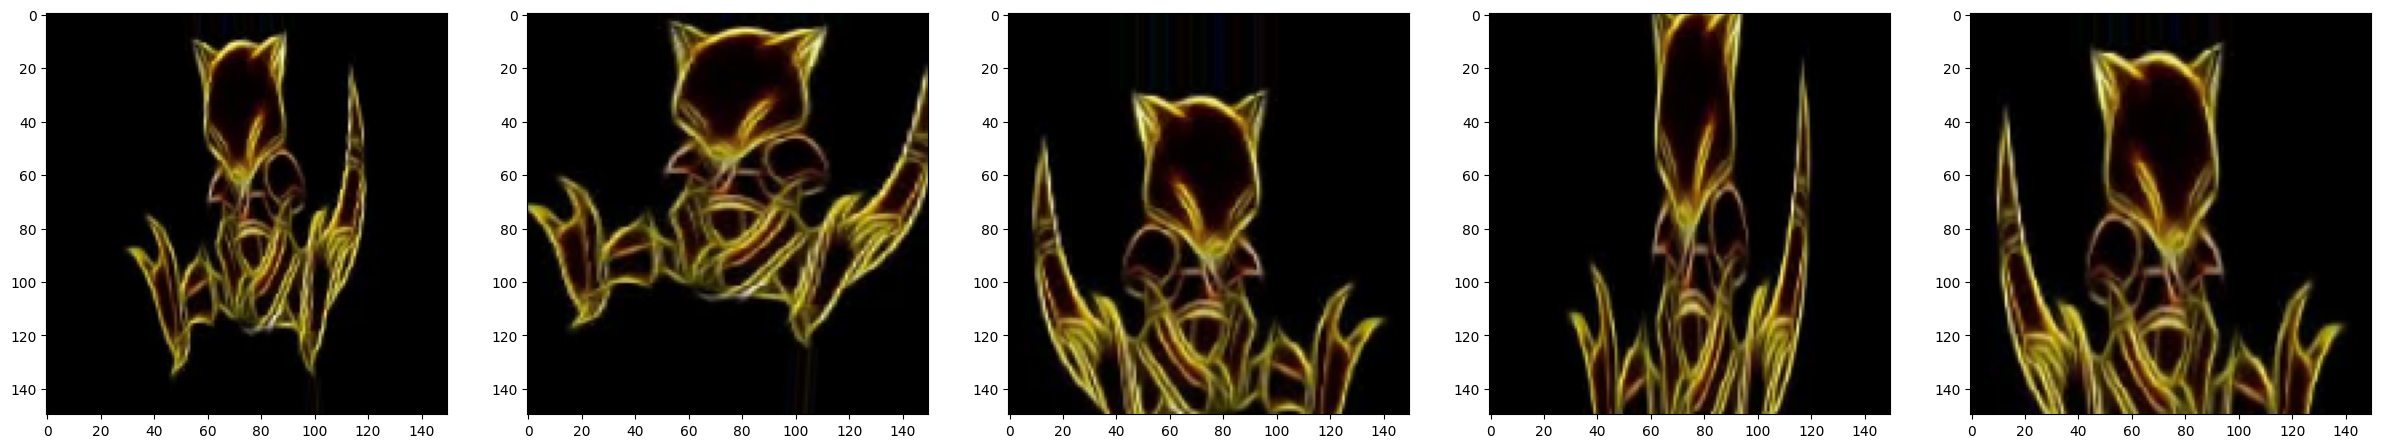

In [13]:
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

In [14]:
class_names = ["Abra", "Arbok", "Aerodactyl", "Articuno", "Bulbasaur", "Cubone", "Diglett", "Ditto"]

In [15]:
print(train_generator.class_indices)

{'Abra': 0, 'Aerodactyl': 1, 'Arbok': 2, 'Articuno': 3, 'Bulbasaur': 4, 'Cubone': 5, 'Diglett': 6, 'Ditto': 7}


In [16]:
model = Sequential([
    Conv2D(10, (3,3), activation='relu', input_shape=(150, 150, 3)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(8, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer=   'adam',
              loss=   "categorical_crossentropy",
              metrics =  ['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 219040)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    56,074,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,326,114 (642.11 MB)

 Trainable params: 56,108,704 (214.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 112,217,410 (428.08 MB)

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=min(50, train_generator.samples // batch_size),
    epochs=3
)

Epoch 1/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.4327 - loss: 1.5471
Epoch 2/3
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 960ms/step - accuracy: 0.5305 - loss: 1.3747
Epoch 3/3


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


50/50 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5589 - loss: 1.3160


In [20]:
test_loss, test_acc = model.evaluate(test_generator)

print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 124s 6s/step - accuracy: 0.6329 - loss: 1.1120

Test accuracy: 0.6203703880310059


In [22]:
history = model.fit(
						train_generator,
						epochs = 4)

Epoch 1/4
81/81 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.5776 - loss: 1.2905
Epoch 2/4
81/81 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6692 - loss: 1.0681
Epoch 3/4
81/81 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.6571 - loss: 1.0248
Epoch 4/4
81/81 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.6823 - loss: 0.9966


KeyError: 'acc'

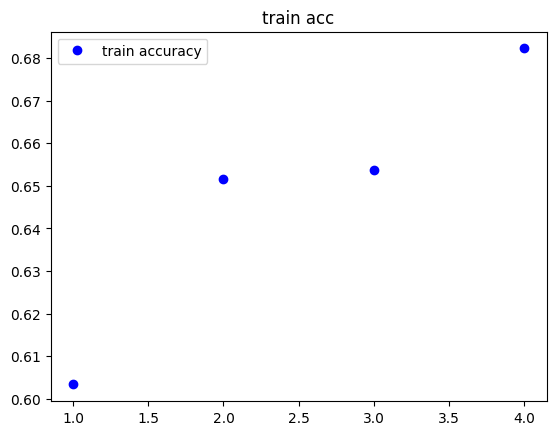

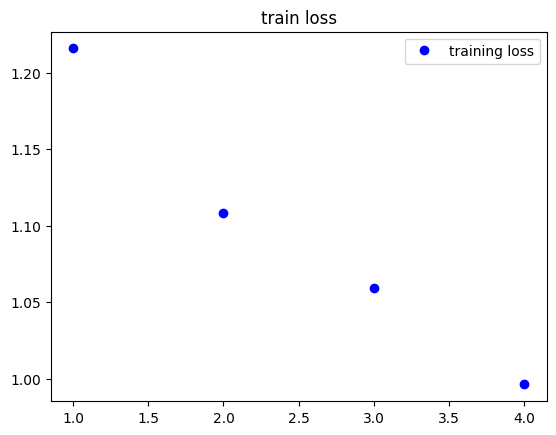

In [24]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [25]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 648 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.6428 - loss: 201.3797

test acc :
 0.6420000195503235


In [26]:
model.save('exportedModels/modelCNN.h5')

In [27]:
import pickle
with open('/content/drive/MyDrive/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)